In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#train_test_split and GridSearch
from sklearn.model_selection import train_test_split,GridSearchCV

#Logistic Regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay

#LDA libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

#CART libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Logistic Regression, LDA and CART

## Data Ingestion: Reading the dataset. Doing the descriptive statistics, checking for duplicates and outliers and writing an inference on it. Performing Univariate and Bivariate Analysis and Multivariate Analysis.

In [2]:
contra_df = pd.read_excel("D:/DataSets/Contraceptive_method_dataset.xlsx")
contra_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [3]:
contra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [4]:
contra_df.Husband_Occupation.value_counts()

3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64

<b> The column *'Husband_Occupation'* is a categorical variable hence we can proceed by converting its dtype to an object.

In [5]:
contra_df.Husband_Occupation = contra_df.Husband_Occupation.astype("object")
contra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [6]:
contra_num = contra_df.select_dtypes(exclude="object")
contra_cat = contra_df.select_dtypes(include="object")

In [7]:
print(contra_df.describe(include='all'))

           Wife_age Wife_ education Husband_education  No_of_children_born  \
count   1402.000000            1473              1473          1452.000000   
unique          NaN               4                 4                  NaN   
top             NaN        Tertiary          Tertiary                  NaN   
freq            NaN             577               899                  NaN   
mean      32.606277             NaN               NaN             3.254132   
std        8.274927             NaN               NaN             2.365212   
min       16.000000             NaN               NaN             0.000000   
25%       26.000000             NaN               NaN             1.000000   
50%       32.000000             NaN               NaN             3.000000   
75%       39.000000             NaN               NaN             4.000000   
max       49.000000             NaN               NaN            16.000000   

       Wife_religion Wife_Working  Husband_Occupation  \
count 

#### Value counts for the different levels of categorical variables

In [8]:
for i in contra_cat.columns:
    print("Value counts for {}:\n{}\n\n".format(i,contra_cat[i].value_counts(ascending=False)))

Value counts for Wife_ education:
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


Value counts for Husband_education:
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


Value counts for Wife_religion:
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


Value counts for Wife_Working:
No     1104
Yes     369
Name: Wife_Working, dtype: int64


Value counts for Husband_Occupation:
3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64


Value counts for Standard_of_living_index:
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


Value counts for Media_exposure :
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


Value counts for Contraceptive_method_used:
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




#### Percentages for the different levels of categorical variables

In [9]:
for i in contra_cat.columns:
    print("Value counts for {}:\n{}\n\n".format(i,contra_cat[i].value_counts(normalize=True,ascending=False)))

Value counts for Wife_ education:
Tertiary      0.391718
Secondary     0.278344
Primary       0.226748
Uneducated    0.103191
Name: Wife_ education, dtype: float64


Value counts for Husband_education:
Tertiary      0.610319
Secondary     0.238968
Primary       0.120842
Uneducated    0.029871
Name: Husband_education, dtype: float64


Value counts for Wife_religion:
Scientology        0.850645
Non-Scientology    0.149355
Name: Wife_religion, dtype: float64


Value counts for Wife_Working:
No     0.749491
Yes    0.250509
Name: Wife_Working, dtype: float64


Value counts for Husband_Occupation:
3    0.397149
1    0.295995
2    0.288527
4    0.018330
Name: Husband_Occupation, dtype: float64


Value counts for Standard_of_living_index:
Very High    0.464358
High         0.292600
Low          0.155465
Very Low     0.087576
Name: Standard_of_living_index, dtype: float64


Value counts for Media_exposure :
Exposed        0.926001
Not-Exposed    0.073999
Name: Media_exposure , dtype: float64




### Univariate Analysis

<b> Numeric Variables

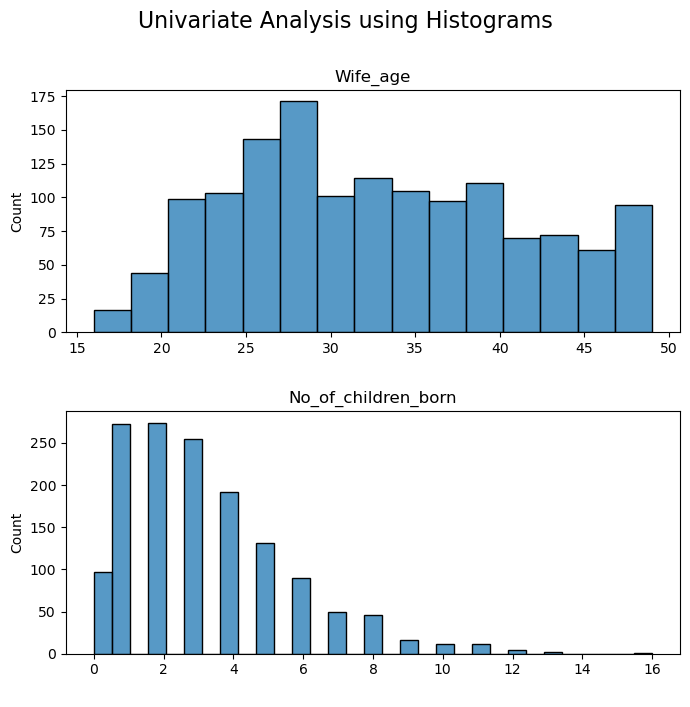

In [10]:
def HistPlot():
    num = contra_num.columns
    col = len(num)
    plt.figure(figsize=(7,10))
    plt.suptitle("Univariate Analysis using Histograms\n",fontsize=16,)
    for i in range(0,col):
        plt.subplot(3,1,i+1)
        plt.title("{}".format(num[i]))
        sns.histplot(x = contra_df[num[i]])
        plt.xlabel(xlabel = " ")
        plt.tight_layout()
HistPlot()

<b> Categoric Variables

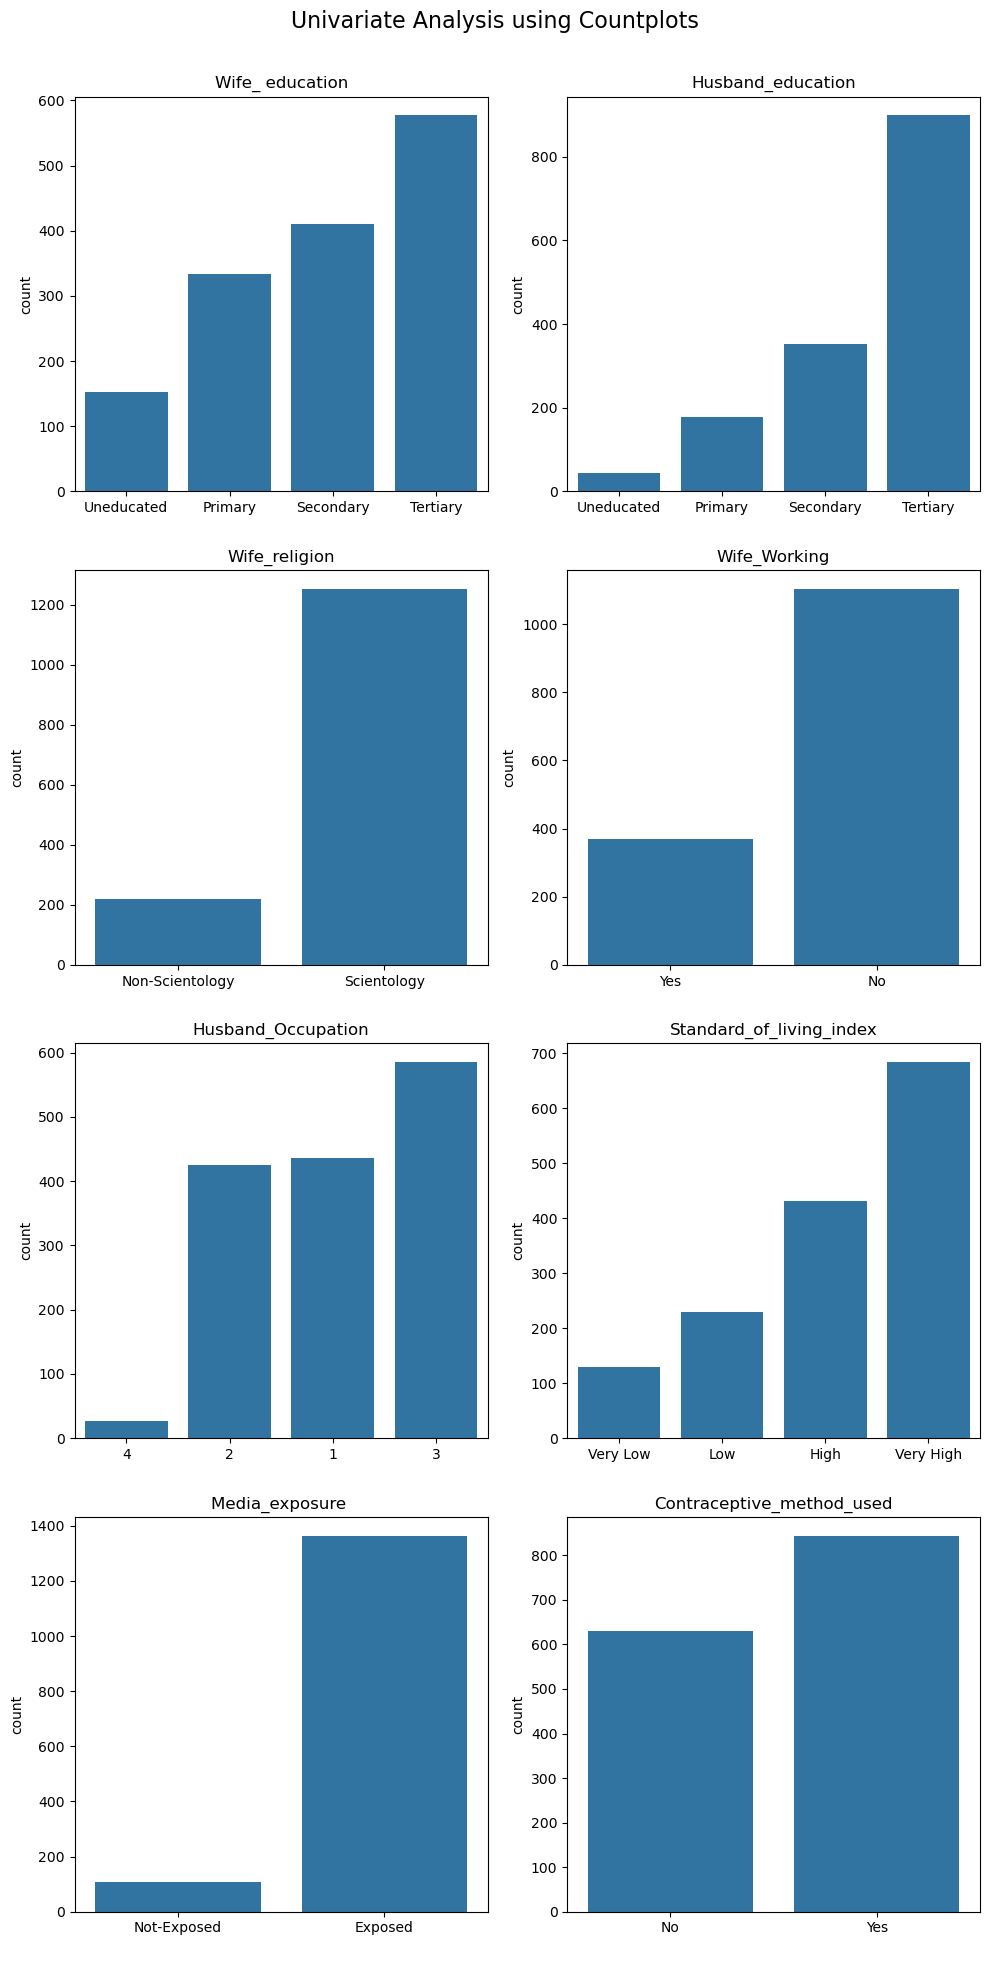

In [11]:
def CountPlot():
    cat = contra_cat.columns
    col = len(cat)
    plt.figure(figsize=(10,20))
    plt.suptitle("Univariate Analysis using Countplots\n\n",fontsize=16)
    for i in range(0,col):
        plt.subplot(4,2,i+1)
        plt.title("{}".format(cat[i]))
        sns.countplot(x = contra_df[cat[i]],order=contra_df[cat[i]].value_counts(ascending=True).index)
        plt.xlabel(xlabel = " ")
        plt.tight_layout()
CountPlot()

### Bivariate Analysis

<b> Categoric and Categoric variables

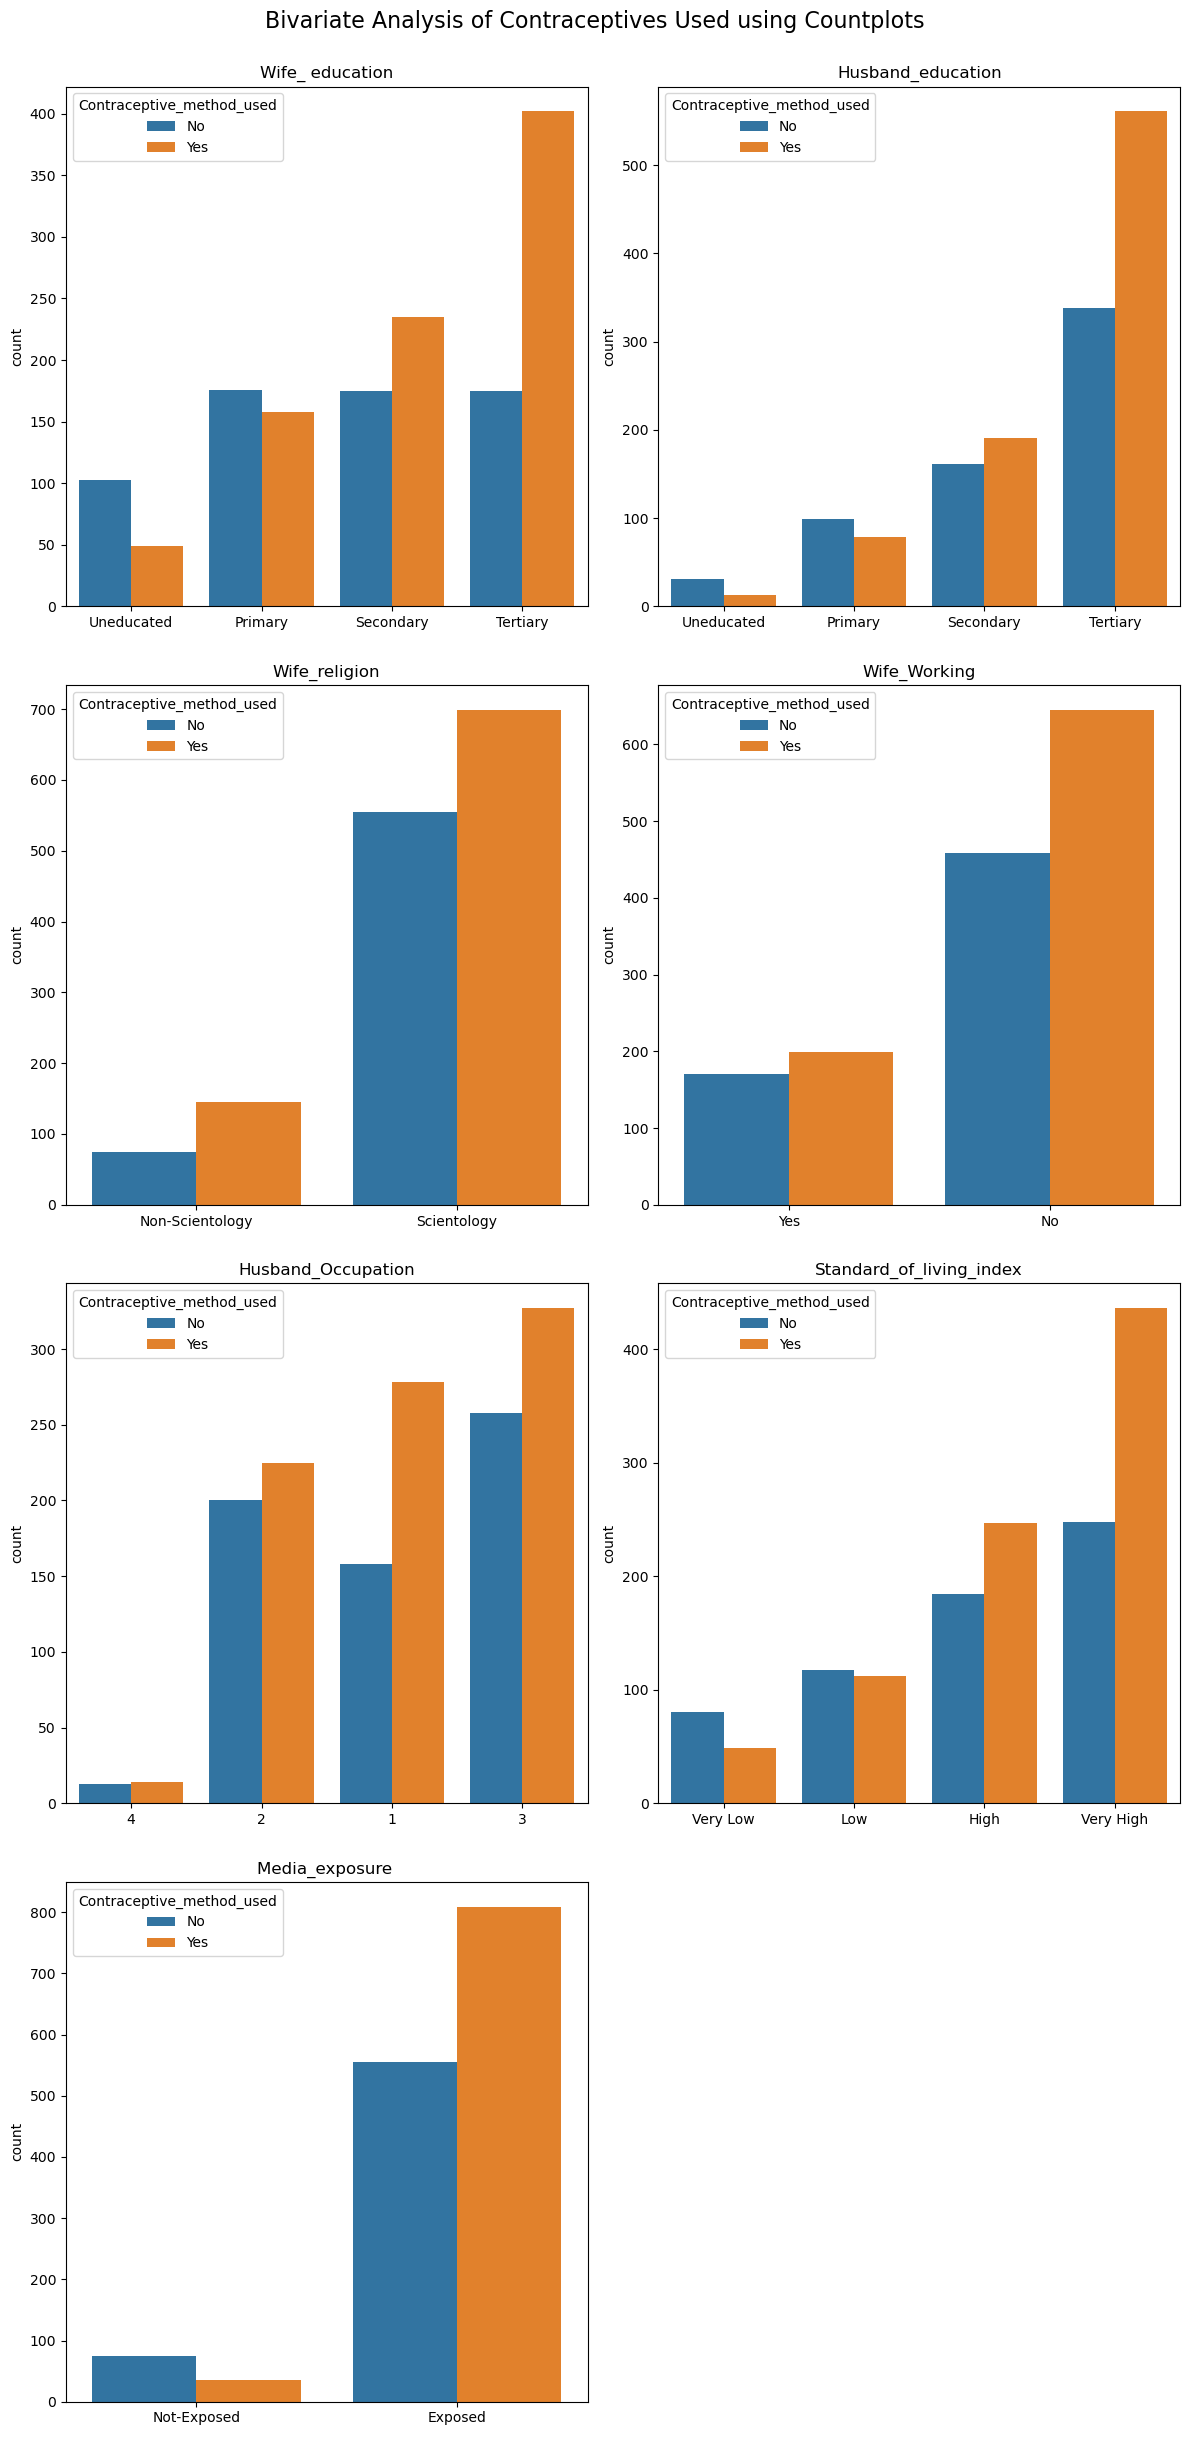

In [12]:
def CountPlot():
    cat = contra_cat.columns
    col = len(cat)
    plt.figure(figsize=(12,25))
    plt.suptitle("Bivariate Analysis of Contraceptives Used using Countplots\n\n",fontsize=16)
    for i in range(0,col-1):
        plt.subplot(4,2,i+1)
        plt.title("{}".format(cat[i]))
        sns.countplot(x = contra_df[cat[i]],hue=contra_df.Contraceptive_method_used,order=contra_df[cat[i]].value_counts(ascending=True).index)
        plt.xlabel(xlabel = " ")
        plt.tight_layout()
CountPlot()

<b> Numeric and Numeric variables

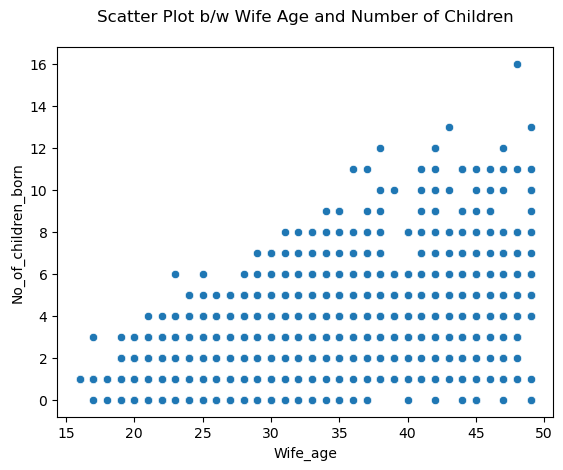

In [13]:
sns.scatterplot(contra_df,x="Wife_age",y="No_of_children_born")
plt.title("Scatter Plot b/w Wife Age and Number of Children\n")
plt.show()

#### Checking the correlation between the numeric variables

In [14]:
contra_num.corr()

,Wife_age,No_of_children_born
Wife_age,1.000000,0.538013
No_of_children_born,0.538013,1.000000


#### Categoric and Numeric variables

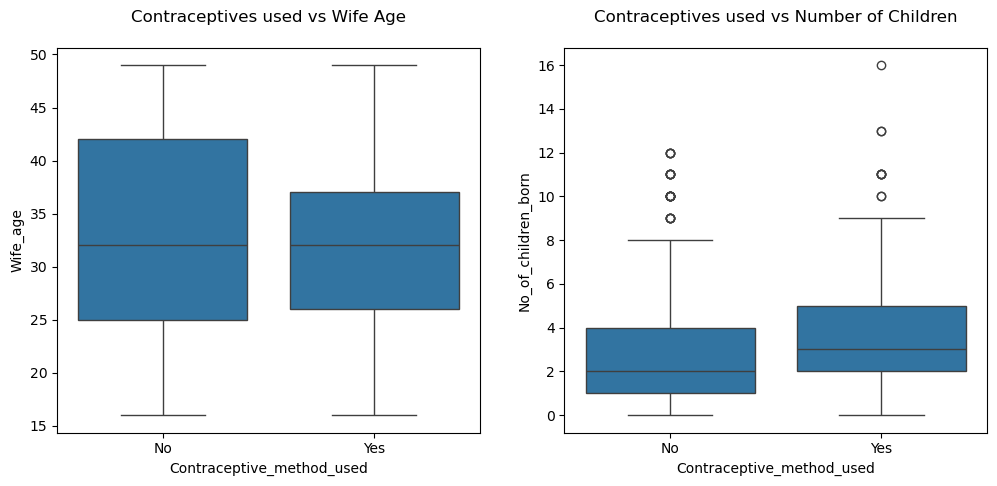

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(contra_df,y="Wife_age",x="Contraceptive_method_used",ax=axes[0])
sns.boxplot(contra_df,y="No_of_children_born",x="Contraceptive_method_used",ax=axes[1])
axes[0].set_title("Contraceptives used vs Wife Age\n")
axes[1].set_title("Contraceptives used vs Number of Children\n")
plt.show()

#### Observations

- There are a total of 9 independent variables in the data with 2 numeric variables and 7 categorical variables.
- The histogram for the number of children is right-skewed with the minimum count of children at 0 and maximum at 16.
- The histogram for the womens' age is slightly right-skewed with the min age value at 16 and maximum at 49.
- The median values for the womens' age and number of children born are 32 and 3 respectively.
- The dependent variable Contraceptive_method_used is a binary variable with approximately 57% positive (Yes) values and 42% negative (No) values.
- Tertiary education dominates in both the wife and husband's education levels columns.
- Approximately 85% of the women follow scientology as their religion while the other 15% follow non-scientology.
- Approximately 25% of the women are working women while the other 75% are non-working.
- 46% of the women have very high standards of living and 29% of the women have high standards of living.
- A majority of the population (92%) has media exposure.

## Data Pre-Processing
### Treating null values

In [16]:
contra_df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

#### Imputing the null values with the respective median values

In [17]:
contra_df["Wife_age"] = np.where(contra_df["Wife_age"].isnull()==True,contra_df["Wife_age"].median(),contra_df["Wife_age"])
contra_df["No_of_children_born"] = np.where(contra_df["No_of_children_born"].isnull()==True,contra_df["No_of_children_born"].median(),contra_df["No_of_children_born"])

In [18]:
contra_df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

<b> All the null values have been treated.

### Treating Duplicate Values

In [19]:
contra_df[contra_df.duplicated()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1431,32.0,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1440,32.0,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1447,32.0,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1467,29.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes


In [20]:
contra_df = contra_df.drop_duplicates()
contra_df[contra_df.duplicated()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used


<b> All the duplicate values have been treated.

### Treating Outliers

#### Visualizing outliers using boxplots

<Figure size 640x480 with 0 Axes>

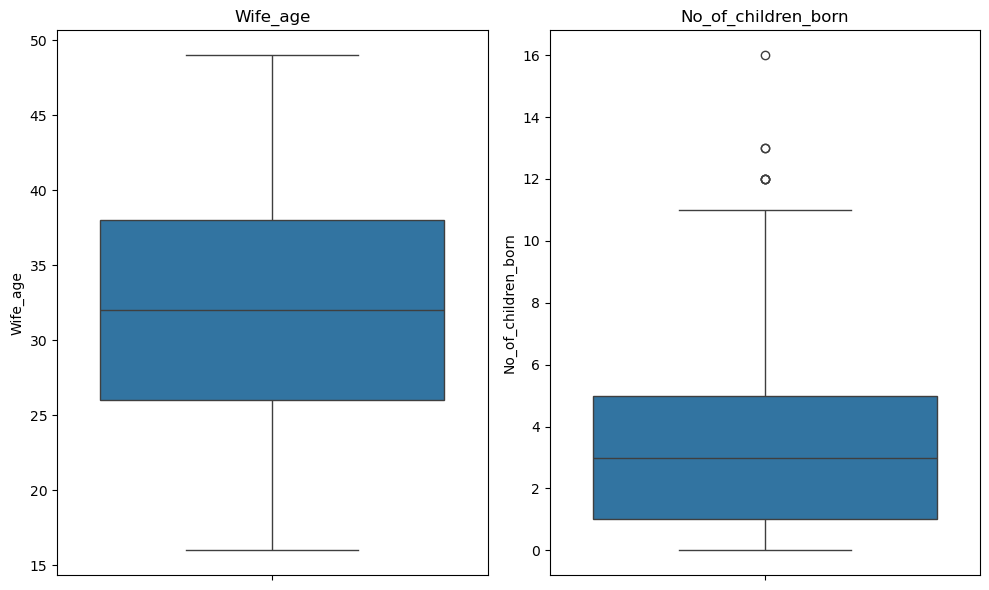

In [21]:
def BoxPlot():
    num = contra_num.columns
    col = len(num)
    plt.suptitle("Outliers using Boxplots\n",fontsize=16)
    plt.figure(figsize=(10,6))
    for i in range(0,col):
        plt.subplot(1,2,i+1)
        plt.title("{}".format(num[i]))
        sns.boxplot(y = contra_df[num[i]])
        plt.tight_layout()
BoxPlot()

<b> It can be observed that there are not many outliers in the dataset hence there is no need for outlier treatment.

## Not scaling the data. Encoding the data (having string values) for Modelling. Data Split: Spliting the data into train and test (70:30). Applying Logistic Regression and LDA (linear discriminant analysis) and CART.

### Data Encoding

<b> The data comprises of many categorical variables of different levels. We can proceed by creating a function to assign numeric categories to these levels. The dependent variable also needs to be changed to numeric categories.

In [22]:
contra_cat1 = contra_cat.drop('Contraceptive_method_used',axis=1)

for col in contra_cat1.columns:
    # Create a mapping dictionary for the unique values in the column
    value_mapping = {value: idx+1 for idx, value in enumerate(contra_df[col].unique())}
    
    # Apply the mapping to the column
    contra_df[col] = contra_df[col].map(value_mapping)

In [23]:
for i in contra_cat1.columns:
    print("Value counts for {}:\n{}\n\n".format(i,contra_df[i].value_counts(ascending=False)))

Value counts for Wife_ education:
4    510
3    398
1    330
2    150
Name: Wife_ education, dtype: int64


Value counts for Husband_education:
3    822
1    347
2    175
4     44
Name: Husband_education, dtype: int64


Value counts for Wife_religion:
1    1182
2     206
Name: Wife_religion, dtype: int64


Value counts for Wife_Working:
1    1040
2     348
Name: Wife_Working, dtype: int64


Value counts for Husband_Occupation:
2    570
1    414
3    377
4     27
Name: Husband_Occupation, dtype: int64


Value counts for Standard_of_living_index:
2    613
1    419
3    227
4    129
Name: Standard_of_living_index, dtype: int64


Value counts for Media_exposure :
1    1279
2     109
Name: Media_exposure , dtype: int64




#### Assiging numeric values to the dependent variable

In [24]:
contra_df.Contraceptive_method_used = np.where(contra_df.Contraceptive_method_used=="No",0,contra_df.Contraceptive_method_used)
contra_df.Contraceptive_method_used = np.where(contra_df.Contraceptive_method_used=="Yes",1,contra_df.Contraceptive_method_used)
contra_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,1,3.0,1,1,1,1,1,0
1,45.0,2,1,10.0,1,1,2,2,1,0
2,43.0,1,1,7.0,1,1,2,2,1,0
3,42.0,3,2,9.0,1,1,2,1,1,0
4,36.0,3,1,8.0,1,1,2,3,1,0


### Splitting the data

#### Converting the data types into string values

In [25]:
for i in contra_df.columns:
    contra_df[i] = contra_df[i].astype("float64")
contra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   float64
 2   Husband_education          1388 non-null   float64
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   float64
 5   Wife_Working               1388 non-null   float64
 6   Husband_Occupation         1388 non-null   float64
 7   Standard_of_living_index   1388 non-null   float64
 8   Media_exposure             1388 non-null   float64
 9   Contraceptive_method_used  1388 non-null   float64
dtypes: float64(10)
memory usage: 119.3 KB


#### Splitting the data into training and test data

In [26]:
X = contra_df.drop("Contraceptive_method_used",axis=1)
y = contra_df["Contraceptive_method_used"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3)

### Fitting the Logistic Regression model

In [27]:
log_model = LogisticRegression(solver='newton-cg',max_iter=10000,verbose=True,n_jobs=2)
log_model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)

### Fitting the LDA model

In [28]:
clf = LinearDiscriminantAnalysis()
lda_model = clf.fit(X_train,y_train)

### Fitting the CART model

In [29]:
CART_model = DecisionTreeClassifier(criterion='gini')
CART_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Creating the Contraceptive file to store the created information for the Decision Tree

In [30]:
y_train_label = ["No","Yes"]
Contraceptive_File = open("D:/DataSets/Contraceptive_File.dot",'w')
dot_data = tree.export_graphviz(CART_model, out_file=Contraceptive_File, feature_names = list(X_train), class_names = list(y_train_label))
Contraceptive_File.close()

## Performance Metrics: Checking the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Comparing both the models and write inference which model is best/optimized.

## Inference: Basis on these predictions, the insights and recommendations. Explaining and summarising the various steps performed in this project. Providing proper business interpretation and actionable insights present.


### Logistic Regression

#### Visualizing the correlation trends using a Heatmap

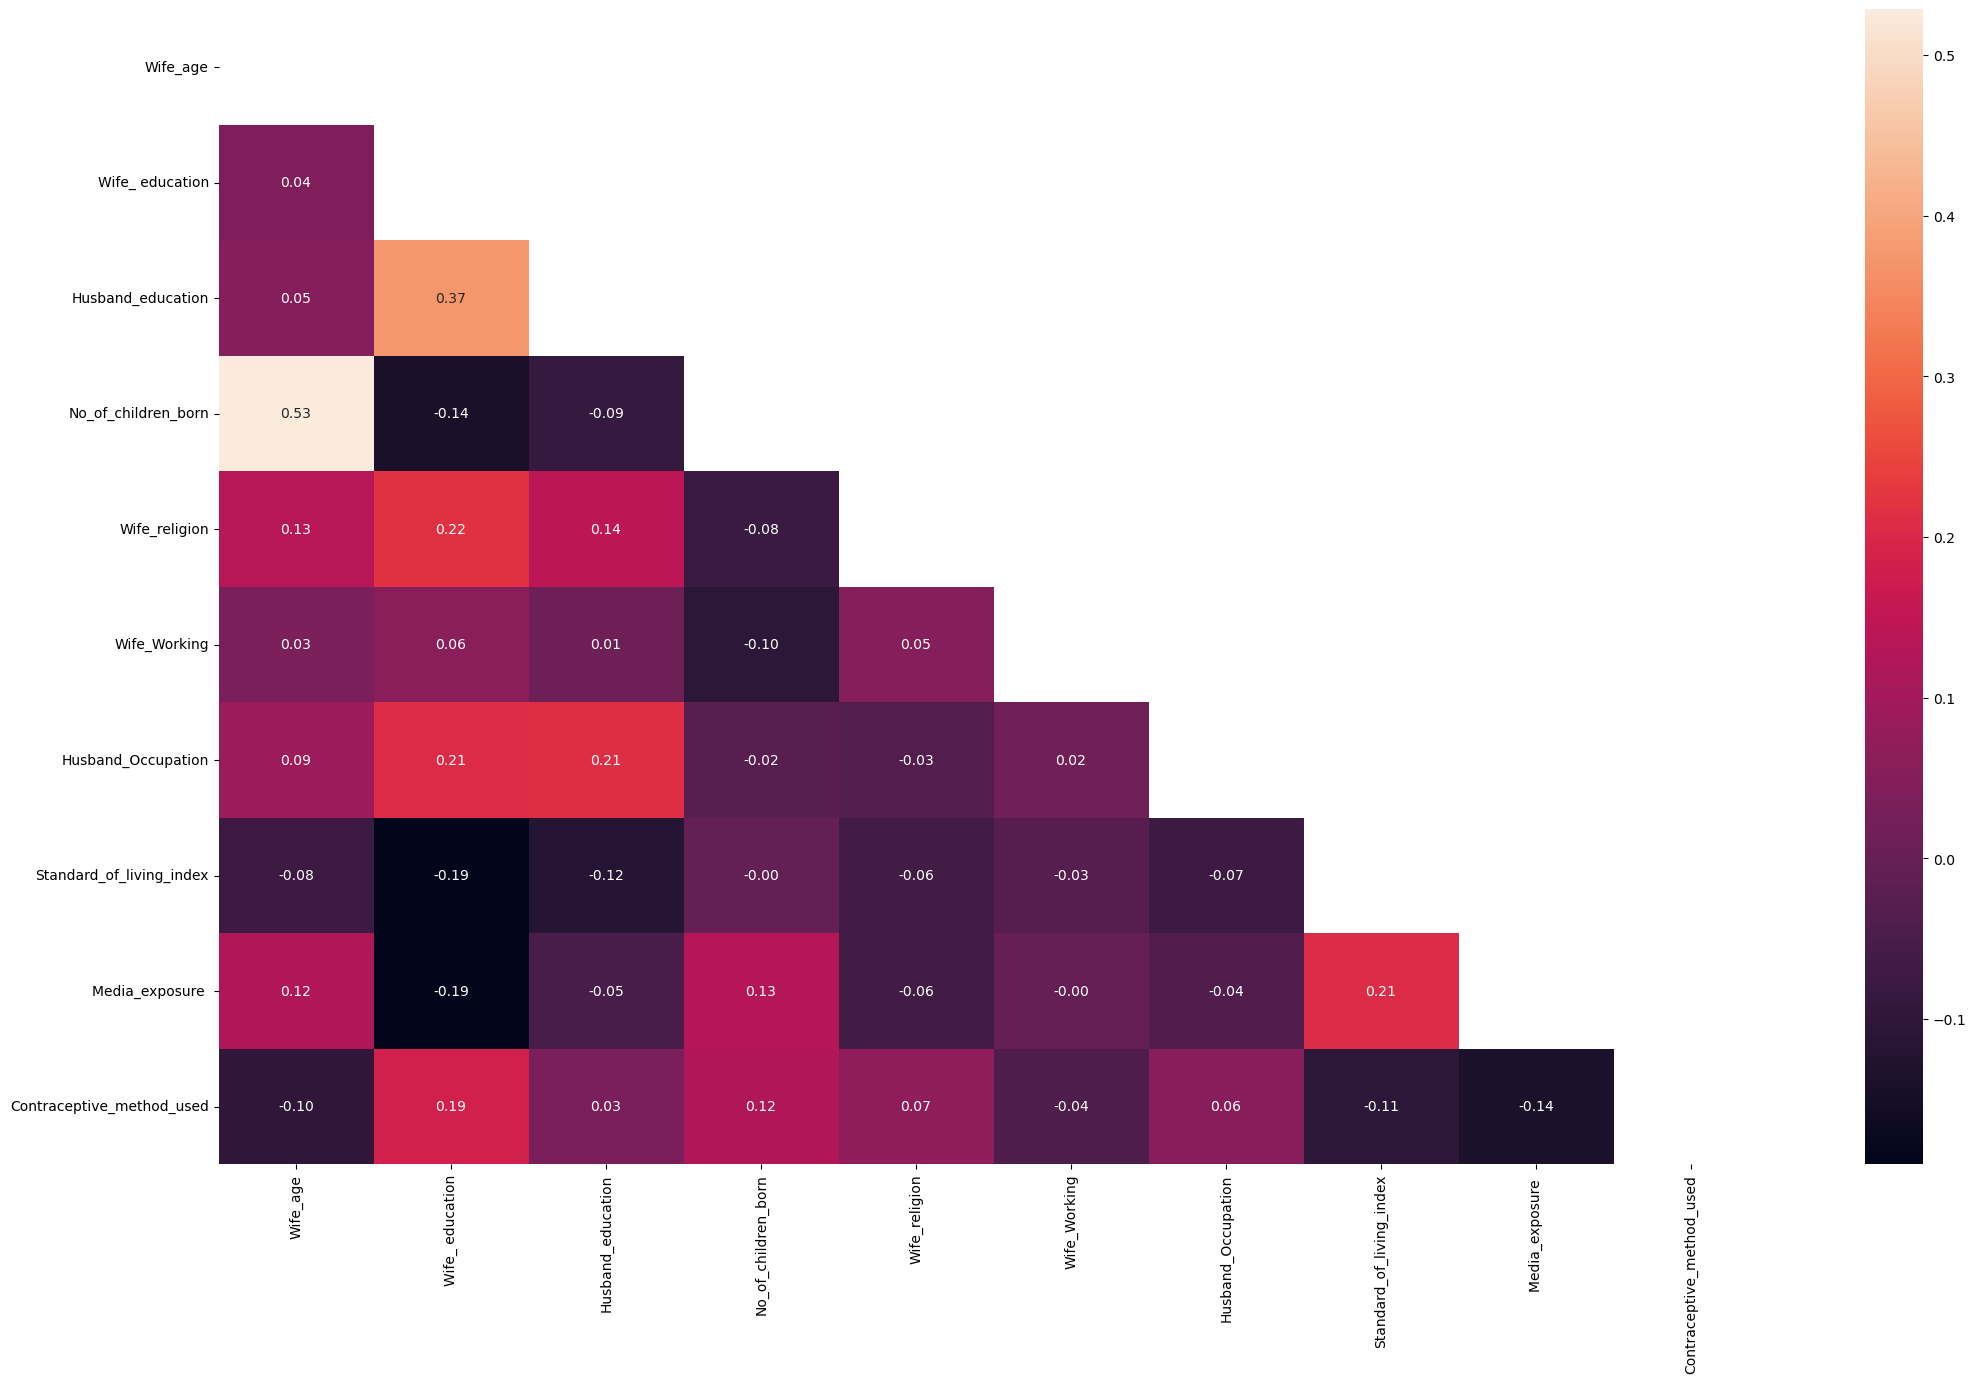

In [31]:
corr = contra_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(contra_df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

<b> It can be observed from the heatmap that there isn't high correlation amongst the variables. The highest correlation exists between the '*no_of_children_born*' and *'wife_age'* columns which need not be treated for now.

#### Training Data
   - Confusion Matrix, Classification Report and Model Score

In [32]:
ytrain_predict_log = log_model.predict(X_train)
model_score_train_log = log_model.score(X_train, y_train)

#### Classification Report and Confusion Matrix

Model Score: 0.682

Confusion Matrix:

[[218 206]
 [103 444]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.68      0.51      0.59       424
         1.0       0.68      0.81      0.74       547

    accuracy                           0.68       971
   macro avg       0.68      0.66      0.66       971
weighted avg       0.68      0.68      0.67       971


Actual Value Counts:

1.0    547
0.0    424
Name: Contraceptive_method_used, dtype: int64


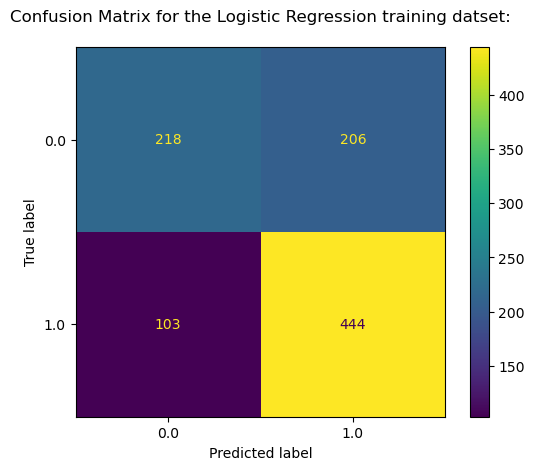

In [33]:
cm = confusion_matrix(y_train,ytrain_predict_log)
report = classification_report(y_train,ytrain_predict_log)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Value Counts:\n\n{}".format(round(model_score_train_log,3),cm,report,y_train.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = log_model.classes_)
disp.plot()
plt.title("Confusion Matrix for the Logistic Regression training datset:\n");

- AUC and ROC Curve

AUC Score: 0.699


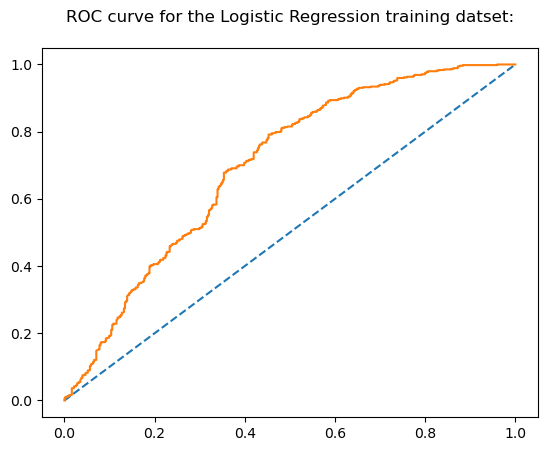

In [34]:
probs = log_model.predict_proba(X_train)
probs = probs[:,1]
auc = roc_auc_score(y_train,probs)
print("AUC Score: %.3f" % auc)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_train,tpr_train)
plt.title("ROC curve for the Logistic Regression training datset:\n");
plt.show()

<b> Following inferences can be drawn from the Logistic Regression model for the training data:</b>

- The model predicted that 321 women did not use contraceptives while 650 women did use contraceptives while the actual values stand at 424 and 547 respectively.
- The model score and accuracy both stand at 68%
- True Positive -> 444 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 218 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 206 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 103 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 70%.

#### Testing Data
   - Confusion Matrix, Classification Report and Model Score

Model Score: 0.628

Confusion Matrix:

[[ 92  98]
 [ 57 170]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54       190
         1.0       0.63      0.75      0.69       227

    accuracy                           0.63       417
   macro avg       0.63      0.62      0.61       417
weighted avg       0.63      0.63      0.62       417


Actual Counts:

1.0    227
0.0    190
Name: Contraceptive_method_used, dtype: int64


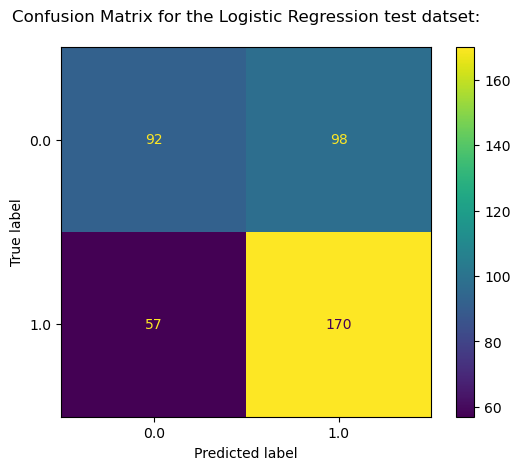

In [35]:
ytest_predict_log = log_model.predict(X_test)
model_score_test_log = log_model.score(X_test, y_test)

#Classification Report and Confusion Matrix

cm = confusion_matrix(y_test,ytest_predict_log)
report = classification_report(y_test,ytest_predict_log)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Counts:\n\n{}".format(round(model_score_test_log,3),cm,report,y_test.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = log_model.classes_)
disp.plot()
plt.title("Confusion Matrix for the Logistic Regression test datset:\n");

- AUC and ROC Curve

AUC Score: 0.689


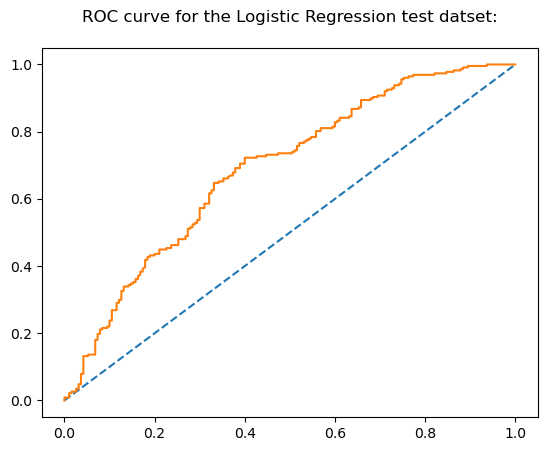

In [36]:
probs = log_model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC Score: %.3f" % auc)

fpr_test,tpr_test,threshold_test = roc_curve(y_test,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_test,tpr_test)
plt.title("ROC curve for the Logistic Regression test datset:\n");
plt.show()

<b> Following inferences can be drawn from the Logistic Regression model for the testing data:</b>

- The model predicted that 149 women did not use contraceptives while 268 women did use contraceptives while the actual values stand at 190 and 227 respectively.
- The model score and accuracy both stand at approximately 63%.
- True Positive -> 170 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 92 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 98 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 57 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 70%.

<b> It can be concluded that the model doesn't have high predictive efficiency for our data however it doesn't overfit our test data.

### LDA

#### Training Data
   - Confusion Matrix, Classification Report and Model Score

In [37]:
ytrain_predict_lda = lda_model.predict(X_train)
model_score_train_lda = lda_model.score(X_train, y_train)


#### Classification Report and Confusion Matrix

Model Score: 0.677

Confusion Matrix:

[[214 210]
 [104 443]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.67      0.50      0.58       424
         1.0       0.68      0.81      0.74       547

    accuracy                           0.68       971
   macro avg       0.68      0.66      0.66       971
weighted avg       0.68      0.68      0.67       971


Actual Value Counts:

1.0    547
0.0    424
Name: Contraceptive_method_used, dtype: int64


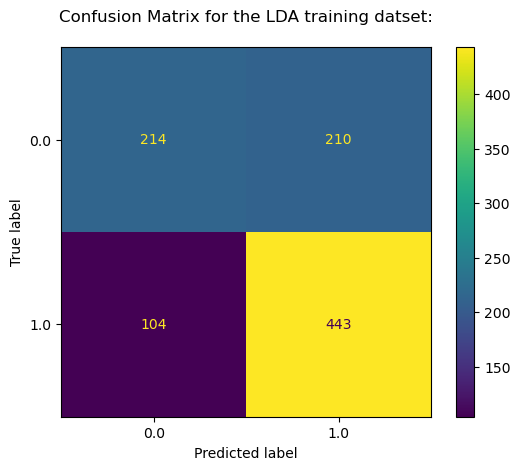

In [38]:
cm = confusion_matrix(y_train,ytrain_predict_lda)
report = classification_report(y_train,ytrain_predict_lda)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Value Counts:\n\n{}".format(round(model_score_train_lda,3),cm,report,y_train.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = lda_model.classes_)
disp.plot();
plt.title("Confusion Matrix for the LDA training datset:\n");

- AUC and ROC Curve

AUC Score: 0.699


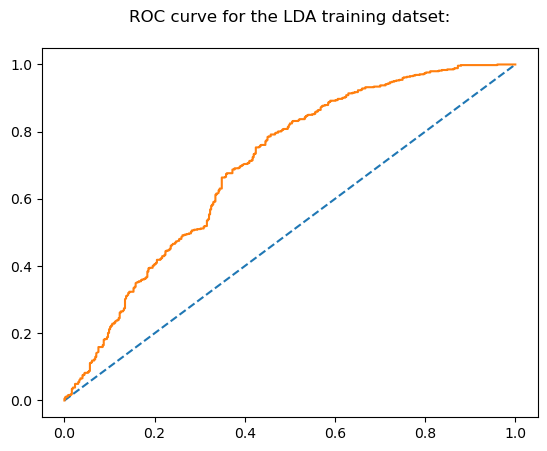

In [39]:
probs = lda_model.predict_proba(X_train)
probs = probs[:,1]
auc = roc_auc_score(y_train,probs)
print("AUC Score: %.3f" % auc)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_train,tpr_train)
plt.title("ROC curve for the LDA training datset:\n")
plt.show()

<b> Following inferences can be drawn from the LDA model for the training data:</b>

- The model predicted that 318 women did not use contraceptives while 653 women did use contraceptives while the actual values stand at 424 and 547 respectively.
- The model score and accuracy both stand at 68%
- True Positive -> 443 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 214 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 210 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 104 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 70%.

#### Testing Data
   - Confusion Matrix, Classification Report and Model Score

Model Score: 0.633

Confusion Matrix:

[[ 91  99]
 [ 54 173]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.63      0.48      0.54       190
         1.0       0.64      0.76      0.69       227

    accuracy                           0.63       417
   macro avg       0.63      0.62      0.62       417
weighted avg       0.63      0.63      0.62       417


Actual Value Counts:

1.0    227
0.0    190
Name: Contraceptive_method_used, dtype: int64


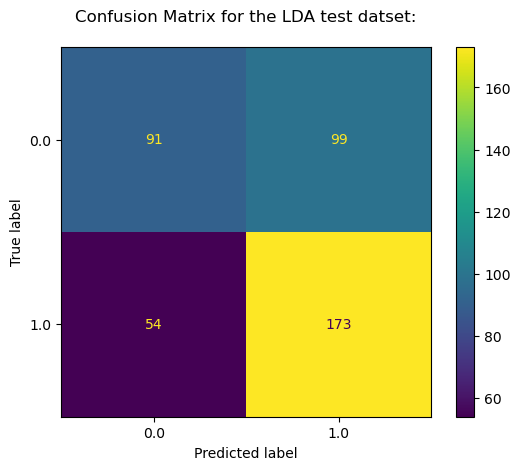

In [40]:
ytest_predict_lda = lda_model.predict(X_test)
model_score_test_lda = lda_model.score(X_test, y_test)

#Classification Report and Confusion Matrix

cm = confusion_matrix(y_test,ytest_predict_lda)
report = classification_report(y_test,ytest_predict_lda)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Value Counts:\n\n{}".format(round(model_score_test_lda,3),cm,report,y_test.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = lda_model.classes_)
disp.plot();
plt.title("Confusion Matrix for the LDA test datset:\n");

- AUC and ROC Curve

AUC Score: 0.689


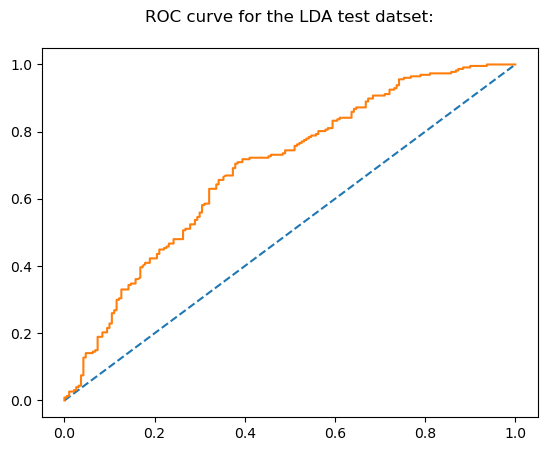

In [41]:
probs = lda_model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC Score: %.3f" % auc)

fpr_test,tpr_test,threshold_test = roc_curve(y_test,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_test,tpr_test)
plt.title("ROC curve for the LDA test datset:\n");
plt.show()

<b> Following inferences can be drawn from the LDA model for the testing data:</b>

- The model predicted that 145 women did not use contraceptives while 272 women did use contraceptives while the actual values stand at 190 and 227 respectively.
- The model score and accuracy both stand at approximately 63%.
- True Positive -> 173 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 91 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 99 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 54 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 69%.

<b> It can be noticed that the predictions made by the LDA model are very similar to predictions of the Logogistic Regression model. The LDA model also doesn't have high predictive efficiency for our data.

### CART

<b> Regularising the Decision Tree by tuning the hyperparameters

#### Checking the variable importance of the training dataset

In [42]:
print(pd.DataFrame(CART_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.286502
No_of_children_born       0.265135
Standard_of_living_index  0.112974
Wife_ education           0.096146
Husband_Occupation        0.091045
Husband_education         0.060622
Wife_Working              0.039329
Wife_religion             0.031079
Media_exposure            0.017167


<b> Creating a grid in order to determine the best hyperparameters for our CART model.

In [43]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [44]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='auto',
                       min_samples_leaf=10, random_state=1024)

<b> Building a new model by using the best estimators.

In [45]:
CART_model = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5,max_features='sqrt',random_state=1024,min_samples_leaf=10)
CART_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='sqrt',
                       min_samples_leaf=10, random_state=1024)

#### Generating New Tree

In [46]:
y_train_label = ["No","Yes"]
Contraceptive_File = open("D:/DataSets/Contraceptive_File.dot",'w')
dot_data = tree.export_graphviz(CART_model, out_file=Contraceptive_File, feature_names = list(X_train), class_names = list(y_train_label))

Contraceptive_File.close()

#### Checkimg the new variable importance of the training dataset

In [47]:
print(pd.DataFrame(CART_model.feature_importances_,columns=["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.491139
Wife_ education           0.240419
Wife_age                  0.234604
Media_exposure            0.028916
Husband_education         0.004508
Wife_religion             0.000413
Wife_Working              0.000000
Husband_Occupation        0.000000
Standard_of_living_index  0.000000


#### Training Data
   - Confusion Matrix, Classification Report and Model Score

Model Score: 0.708

Confusion Matrix:

[[191 233]
 [ 51 496]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.79      0.45      0.57       424
         1.0       0.68      0.91      0.78       547

    accuracy                           0.71       971
   macro avg       0.73      0.68      0.68       971
weighted avg       0.73      0.71      0.69       971


Actual Value Counts:

1.0    547
0.0    424
Name: Contraceptive_method_used, dtype: int64


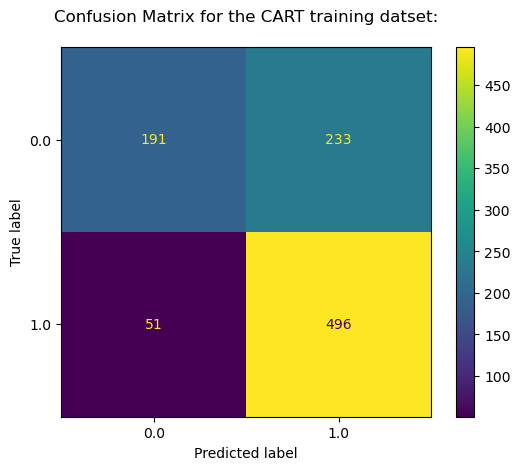

In [48]:
ytrain_predict_CART = CART_model.predict(X_train)
model_score_train_CART = CART_model.score(X_train,y_train)

cm = confusion_matrix(y_train,ytrain_predict_CART)
report = classification_report(y_train,ytrain_predict_CART)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Value Counts:\n\n{}".format(round(model_score_train_CART,3),cm,report,y_train.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = CART_model.classes_)
disp.plot();
plt.title("Confusion Matrix for the CART training datset:\n");

- AUC and ROC Curve

AUC Score: 0.738


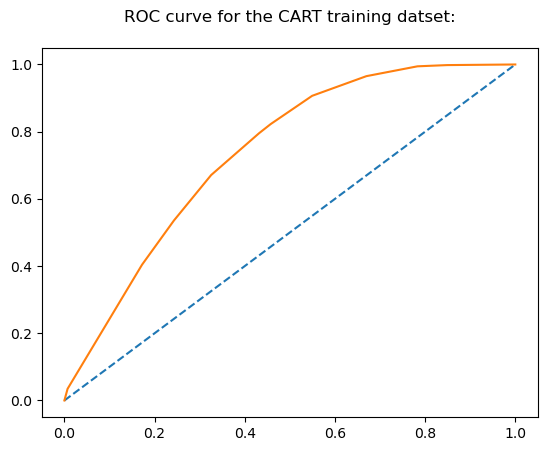

In [49]:
probs = CART_model.predict_proba(X_train)
probs = probs[:,1]
auc = roc_auc_score(y_train,probs)
print("AUC Score: %.3f" % auc)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_train,tpr_train)
plt.title("ROC curve for the CART training datset:\n");
plt.show()

<b> Following inferences can be drawn from the CART model for the training data:</b>

- The model predicted that 242 women did not use contraceptives while 729 women did use contraceptives while the actual values stand at 424 and 547 respectively.
- The model score and accuracy both stand at 71%
- True Positive -> 496 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 191 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 233 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 51 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 73%.

#### Training Data
   - Confusion Matrix, Classification Report and Model Score

Model Score: 0.679

Confusion Matrix:

[[ 77 113]
 [ 21 206]]

Classification Report

              precision    recall  f1-score   support

         0.0       0.79      0.41      0.53       190
         1.0       0.65      0.91      0.75       227

    accuracy                           0.68       417
   macro avg       0.72      0.66      0.64       417
weighted avg       0.71      0.68      0.65       417


Actual Value Counts:

1.0    227
0.0    190
Name: Contraceptive_method_used, dtype: int64


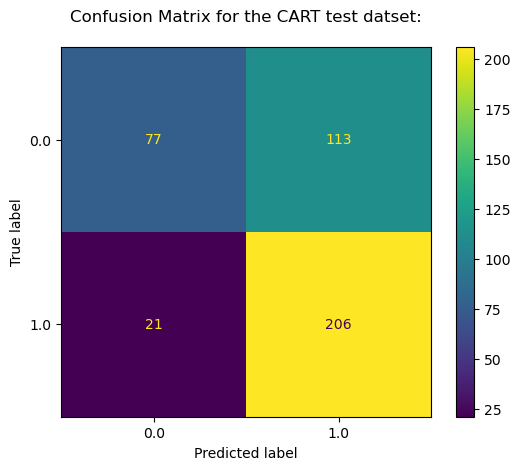

In [50]:
ytest_predict_CART = CART_model.predict(X_test)
model_score_test_CART = CART_model.score(X_test,y_test)

cm = confusion_matrix(y_test,ytest_predict_CART)
report = classification_report(y_test,ytest_predict_CART)

print("Model Score: {}\n\nConfusion Matrix:\n\n{}\n\nClassification Report\n\n{}\n\nActual Value Counts:\n\n{}".format(round(model_score_test_CART,3),cm,report,y_test.value_counts()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = CART_model.classes_)
disp.plot();
plt.title("Confusion Matrix for the CART test datset:\n");

- AUC and ROC Curve

AUC Score: 0.685


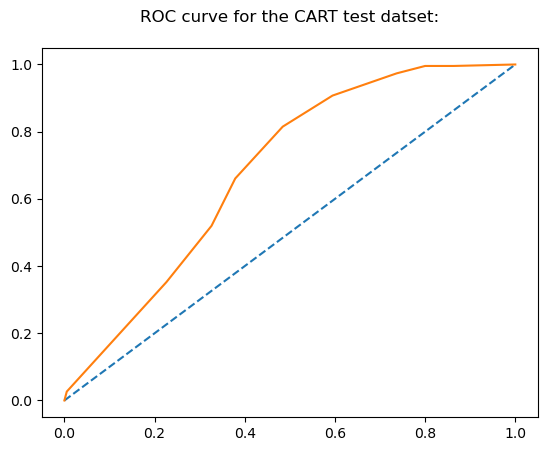

In [51]:
probs = CART_model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC Score: %.3f" % auc)

fpr_test,tpr_test,threshold_test = roc_curve(y_test,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr_test,tpr_test)
plt.title("ROC curve for the CART test datset:\n");
plt.show()

<b> Following inferences can be drawn from the CART model for the test data:</b>

- The model predicted that 98 women did not use contraceptives while 319 women did use contraceptives while the actual values stand at 190 and 227 respectively.
- The model score and accuracy both stand at 68%
- True Positive -> 206 women who did use contraceptives (1) were predicted correctly (1) by the model.
- True Negative -> 77 women who didn't use any contraceptives (0) were predicted correctly (0) by the model.
- False Positive -> 113 women who didn't use any contraceptives (0) were predicted incorrectly (1) by the model.
- False Negative -> 21 women who did use contraceptives (1) were predicted incorrectly (0) by the model.
- The AUC Score for the model is approximately 69%.

<b> It can be said that the CART model is the most efficient model out of the three models respectively.